# <center> Web Scraping Project - Analyzing Asian Dramas </center>

### Dataset
The dataset contains all completed television dramas from South Korea, Japan, China, Taiwan, Hong Kong, Thailand, and Philippines released in 2000 until present. There is a total of 12039 dramas with 14 features that are as follow:
- **title** - The title of the drama, _string_
- **country** - The country of origin, _string_
- **episodes** - The number of episodes, _int64
- **date_aired** - The broadcast date, _string_
- **network** - The broadcast network, _string_
- **actor_1** - The first main actor, _string_
- **actor_2** - The second main actor, _string_
- **rating** - The overall rating by users, _float64_
- **users** - The number of users who rated, _int64_ 
- **watchers** - The number of viewers, _int64_
- **ranking** - The overall position of the drama sorted by how users score the drama, _int64_  
- **popularity** - The overall position of the drama sorted by how many users have the drama in their lists, _int64_
- **genre** - The category (or categories) the drama is characterized into, _string_
- **tag** - The labels attached to the drama for identification, _string_

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('dramas.csv')

print(df.shape)
display(df.head(5))

(12039, 14)


actor_1          actor_2      country                   date_aired  \
0  Jo Jung Suk    Yoo Yeon Seok  South Korea  Mar 12, 2020 - May 28, 2020   
1     Bae Suzy     Lee Jong Suk  South Korea  Sep 27, 2017 - Nov 16, 2017   
2  Joo Ji Hoon  Ryu Seung Ryong  South Korea                 Jan 25, 2019   
3    Yoo Ah In      Im Soo Jung  South Korea  Apr  7, 2017 - Jun  3, 2017   
4      Ji Sung   Hwang Jung Eum  South Korea  Jan  7, 2015 - Mar 12, 2015   

   episodes                                              genre  \
0        12  Friendship,  Comedy,  Romance,  Life,  Drama, ...   
1        32  Thriller,  Mystery,  Comedy,  Romance,  Drama,...   
2         6   Thriller,  Historical,  Horror,  Drama,  Zombies   
3        16  Friendship,  Mystery,  Comedy,  Romance,  Supe...   
4        20           Psychological,  Comedy,  Romance,  Drama   

                                   network  popularity  ranking  rating  \
0  tvN, Netflix, Netflix, Netflix, Netflix         137        2     9.2   
1                                      SBS          12       41     8.7   
2                                  Netflix         164       38     8.8   
3                                      tvN         104       37     8.8   
4                                      MBC          16       31     8.8   

                                                 tag                    title  \
0  Strong Friendship, Slice Of Life, Doctor, Mult...        Hospital Playlist   
1  Precognition, Nice Male Lead, Neighbors, Murde...  While You Were Sleeping   
2  Joseon Dynasty, Power Struggle, Adapted From A...                  Kingdom   
3  Reincarnation, Strong Friendship, Hardworking ...       Chicago Typewriter   
4  Dissociative Identity Disorder, Trauma, Boss/E...         Kill Me, Heal Me   

   users  watchers  
0  11888     25541  
1  34395     64782  
2  12304     22599  
3  12790     29420  
4  32044     62620

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12039 entries, 0 to 12038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   actor_1     11811 non-null  object 
 1   actor_2     11623 non-null  object 
 2   country     12039 non-null  object 
 3   date_aired  12039 non-null  object 
 4   episodes    12039 non-null  int64  
 5   genre       11564 non-null  object 
 6   network     10681 non-null  object 
 7   popularity  12039 non-null  int64  
 8   ranking     12039 non-null  int64  
 9   rating      10582 non-null  float64
 10  tag         7342 non-null   object 
 11  title       12038 non-null  object 
 12  users       12039 non-null  int64  
 13  watchers    12039 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.3+ MB


## Data Cleaning

I first examined the dataframe for missingness. There was one drama missing a title, so I imputed it. It is normal for the other features to be missing as there may not be enough information provided.

In [4]:
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = (df.isnull().sum(axis=0)/df.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing_data[missing_data.Total>0]

Total   Percent
tag       4697  0.390149
rating    1457  0.121023
network   1358  0.112800
genre      475  0.039455
actor_2    416  0.034554
actor_1    228  0.018938
title        1  0.000083

In [5]:
df[df['title'].isnull()]

actor_1          actor_2 country                   date_aired  \
9118  Ikuta Toma  Kazama Shunsuke   Japan  Jun 19, 2006 - Aug 28, 2006   

      episodes                         genre network  popularity  ranking  \
9118        11  Action,  Friendship,  Comedy     TBS        2857     2664   

      rating                               tag title  users  watchers  
9118     6.9  Ishida Ira, Adapted From A Novel   NaN    780      1662

In [6]:
df['title']=df['title'].fillna("Akihabara@DEEP")

In [7]:
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = (df.isnull().sum(axis=0)/df.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing_data[missing_data.Total>0]

Total   Percent
tag       4697  0.390149
rating    1457  0.121023
network   1358  0.112800
genre      475  0.039455
actor_2    416  0.034554
actor_1    228  0.018938

I converted `date_aired` from _string_ format to _datetime_ and returned a new column for aired month and year. However, there were three rows that had had incomplete information for `date_aired`, thus they were removed.

In [8]:
delete_row=df[df['date_aired'].str.contains(r'\?.*')].index
df=df.drop(delete_row)

In [9]:
df[["start_date", "end_date"]] = df.date_aired.str.split("-", expand=True)

df.loc[:,'start_date'] =  pd.to_datetime(df.loc[:,'start_date'], infer_datetime_format=True)

df['start_month']=pd.DatetimeIndex(df['start_date']).month
df['start_year']=pd.DatetimeIndex(df['start_date']).year

display(df.head(5))

actor_1          actor_2      country                   date_aired  \
0  Jo Jung Suk    Yoo Yeon Seok  South Korea  Mar 12, 2020 - May 28, 2020   
1     Bae Suzy     Lee Jong Suk  South Korea  Sep 27, 2017 - Nov 16, 2017   
2  Joo Ji Hoon  Ryu Seung Ryong  South Korea                 Jan 25, 2019   
3    Yoo Ah In      Im Soo Jung  South Korea  Apr  7, 2017 - Jun  3, 2017   
4      Ji Sung   Hwang Jung Eum  South Korea  Jan  7, 2015 - Mar 12, 2015   

   episodes                                              genre  \
0        12  Friendship,  Comedy,  Romance,  Life,  Drama, ...   
1        32  Thriller,  Mystery,  Comedy,  Romance,  Drama,...   
2         6   Thriller,  Historical,  Horror,  Drama,  Zombies   
3        16  Friendship,  Mystery,  Comedy,  Romance,  Supe...   
4        20           Psychological,  Comedy,  Romance,  Drama   

                                   network  popularity  ranking  rating  \
0  tvN, Netflix, Netflix, Netflix, Netflix         137        2     9.2   
1                                      SBS          12       41     8.7   
2                                  Netflix         164       38     8.8   
3                                      tvN         104       37     8.8   
4                                      MBC          16       31     8.8   

                                                 tag                    title  \
0  Strong Friendship, Slice Of Life, Doctor, Mult...        Hospital Playlist   
1  Precognition, Nice Male Lead, Neighbors, Murde...  While You Were Sleeping   
2  Joseon Dynasty, Power Struggle, Adapted From A...                  Kingdom   
3  Reincarnation, Strong Friendship, Hardworking ...       Chicago Typewriter   
4  Dissociative Identity Disorder, Trauma, Boss/E...         Kill Me, Heal Me   

   users  watchers start_date       end_date  start_month  start_year  
0  11888     25541 2020-03-12   May 28, 2020            3        2020  
1  34395     64782 2017-09-27   Nov 16, 2017            9        2017  
2  12304     22599 2019-01-25           None            1        2019  
3  12790     29420 2017-04-07   Jun  3, 2017            4        2017  
4  32044     62620 2015-01-07   Mar 12, 2015            1        2015

In `network`, a duplicate of broadcast networks were repeated, thus the repeats were removed for more accurate analysis.

In [10]:
df['network'] = df['network'].fillna('')

In [11]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw


def remove_dup(string):
    return ', '.join(list(dict.fromkeys(string.strip().split(', '))))

with ChainedAssignent():
    df['network'] = df['network'].apply(lambda x: remove_dup(x))
    
display(df.head(5))

actor_1          actor_2      country                   date_aired  \
0  Jo Jung Suk    Yoo Yeon Seok  South Korea  Mar 12, 2020 - May 28, 2020   
1     Bae Suzy     Lee Jong Suk  South Korea  Sep 27, 2017 - Nov 16, 2017   
2  Joo Ji Hoon  Ryu Seung Ryong  South Korea                 Jan 25, 2019   
3    Yoo Ah In      Im Soo Jung  South Korea  Apr  7, 2017 - Jun  3, 2017   
4      Ji Sung   Hwang Jung Eum  South Korea  Jan  7, 2015 - Mar 12, 2015   

   episodes                                              genre       network  \
0        12  Friendship,  Comedy,  Romance,  Life,  Drama, ...  tvN, Netflix   
1        32  Thriller,  Mystery,  Comedy,  Romance,  Drama,...           SBS   
2         6   Thriller,  Historical,  Horror,  Drama,  Zombies       Netflix   
3        16  Friendship,  Mystery,  Comedy,  Romance,  Supe...           tvN   
4        20           Psychological,  Comedy,  Romance,  Drama           MBC   

   popularity  ranking  rating  \
0         137        2     9.2   
1          12       41     8.7   
2         164       38     8.8   
3         104       37     8.8   
4          16       31     8.8   

                                                 tag                    title  \
0  Strong Friendship, Slice Of Life, Doctor, Mult...        Hospital Playlist   
1  Precognition, Nice Male Lead, Neighbors, Murde...  While You Were Sleeping   
2  Joseon Dynasty, Power Struggle, Adapted From A...                  Kingdom   
3  Reincarnation, Strong Friendship, Hardworking ...       Chicago Typewriter   
4  Dissociative Identity Disorder, Trauma, Boss/E...         Kill Me, Heal Me   

   users  watchers start_date       end_date  start_month  start_year  
0  11888     25541 2020-03-12   May 28, 2020            3        2020  
1  34395     64782 2017-09-27   Nov 16, 2017            9        2017  
2  12304     22599 2019-01-25           None            1        2019  
3  12790     29420 2017-04-07   Jun  3, 2017            4        2017  
4  32044     62620 2015-01-07   Mar 12, 2015            1        2015

In [12]:
df['network'] = df['network'].replace('', np.nan)

## Exploratory Data Analysis

#### Drama Count

From observing the total dramas by each country, Japan comes in first with over 3000 dramas, followed by China and Korea.

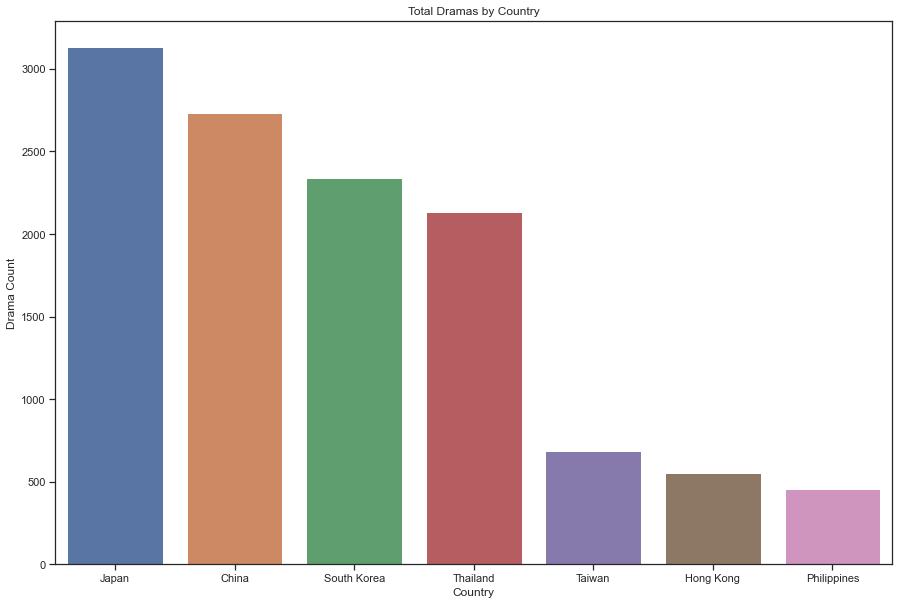

In [27]:
drama_tot = df['country'].value_counts()
drama_df = pd.DataFrame({'country':drama_tot.index, 'drama_count':drama_tot.values})

drama_df = drama_df.sort_values('drama_count', ascending=False)

sns.set_theme(style="ticks")

plt.figure(figsize=(15,10))
sns.barplot(data=drama_df, x='country', y='drama_count')
plt.xlabel('Country')
plt.ylabel('Drama Count')
plt.title('Total Dramas by Country')
plt.show()

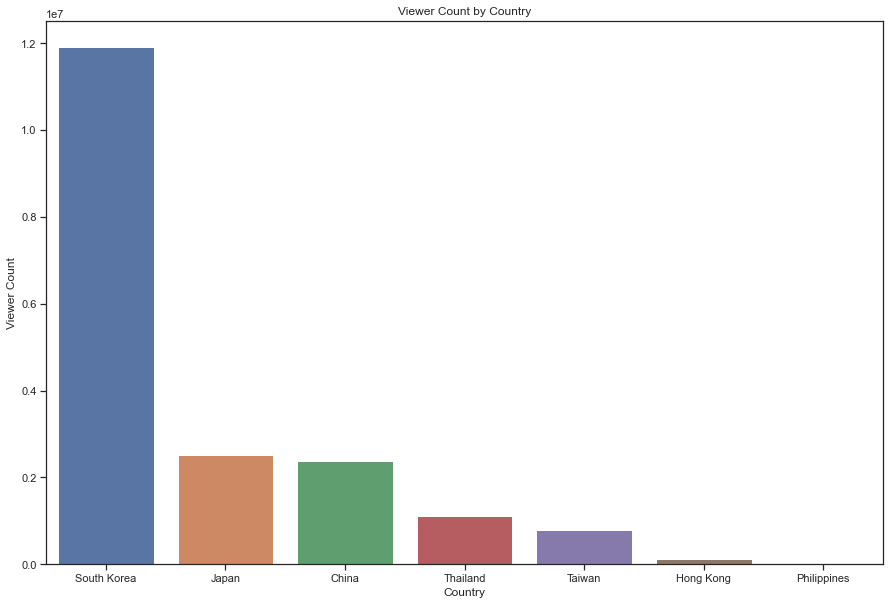

In [25]:
watch_country = df.groupby(['country'])[['watchers']].sum().reset_index()

watch_country = watch_country.sort_values('watchers', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(data=watch_country, x='country', y='watchers')
plt.xlabel('Country')
plt.ylabel('Viewer Count')
plt.title('Viewer Count by Country')
plt.show()

#### Drama Count vs. Watchers & Year

When comparing the number of completed dramas to the number of viewers over the years, both production and viewship increased, with viewership reaching its peak in 2017 and both dropping substantitally in 2020, most likely due to COVID-19. 

In [47]:
#number of dramas by year df
drama_count=df.start_year[df.start_year>1999].value_counts()
drama_years = pd.DataFrame({'start_year':drama_count.index, 'drama_count':drama_count.values})
drama_years = drama_years.sort_values("start_year")

#number of watchers by year df
watcher_count=df[df['start_year']>1999].groupby(['start_year'])[['watchers']].sum()
watcher_count=watcher_count.reset_index()

#merge both df's on start_year
count_vs_watchers = pd.merge(drama_years, watcher_count, on='start_year')
count_vs_watchers['watchers_per_thousand']=(count_vs_watchers['watchers'])/1000

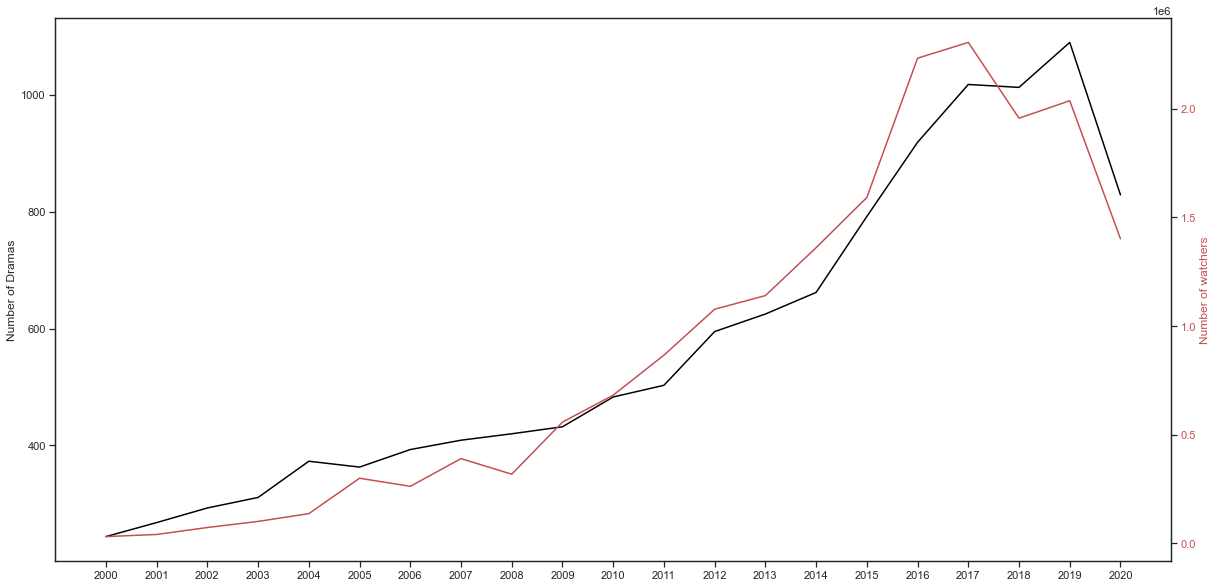

In [48]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.plot(count_vs_watchers.start_year, count_vs_watchers.drama_count, 'black')
ax1.set_ylabel('Number of Dramas')
ax1.set(xticks=count_vs_watchers.start_year)

ax2 = ax1.twinx()
ax2.plot(count_vs_watchers.start_year, count_vs_watchers.watchers, 'r-')
ax2.set_ylabel('Number of watchers', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

#### Drama Count vs Country & Year

When comparing the amount of dramas producted by each country by year, Japan released the most dramas until 2015, with China releasing the most from then until now. It's also interesting to note the growth of Thai dramas, which I did not expect to be currently in third.

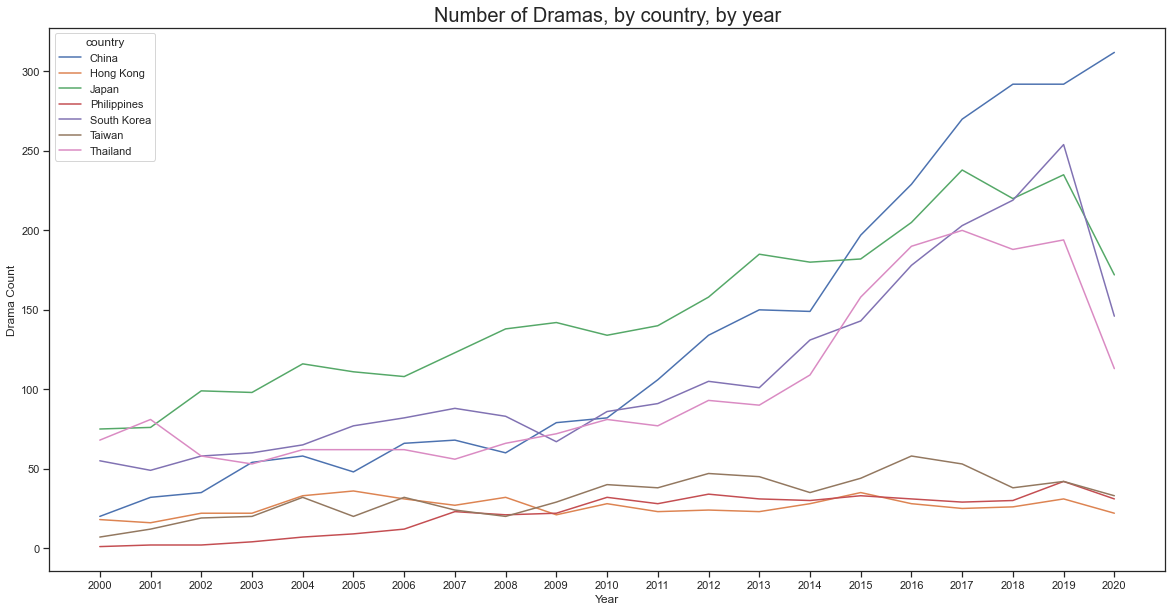

In [49]:
country_count=df[df['start_year']>1999].groupby(['country', 'start_year'])[['title']].count().reset_index()

plt.figure(figsize=(20,10))
ax = sns.lineplot(x='start_year', y='title', hue='country', data=country_count)
ax.set_title('Number of Dramas, by country, by year', size=20)
ax.set(xticks=drama_years.start_year)
ax.set_xlabel('Year')
ax.set_ylabel('Drama Count')
plt.show()

#### Watchers vs. Country & Year

From observing viewership for each country by year, Korean dramas dominates most of the views even though their overall drama count is lower than China and Japan.

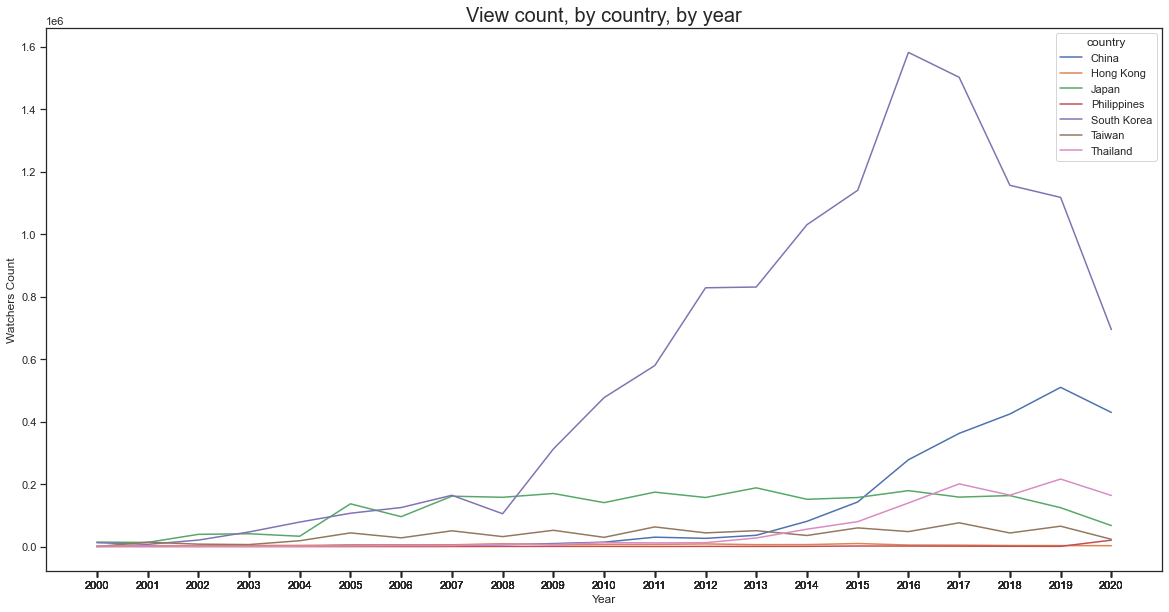

In [50]:
country_watch_count=df[df['start_year']>1999].groupby(['country', 'start_year'])[['watchers']].sum()
country_watch_count=country_watch_count.reset_index()

plt.figure(figsize=(20,10))
ax = sns.lineplot(x='start_year', y='watchers', hue='country', data=country_watch_count)
ax.set_title('View count, by country, by year', size=20)
ax.set(xticks=country_watch_count.start_year)
ax.set_xlabel('Year')
ax.set_ylabel('Watchers Count')
plt.show()

#### Rating vs. users & episode count 

/Users/elizabethyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rating', ylabel='Density'>

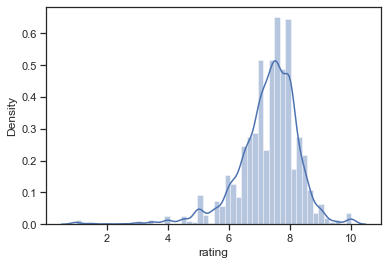

In [54]:
sns.distplot(df.rating.dropna())

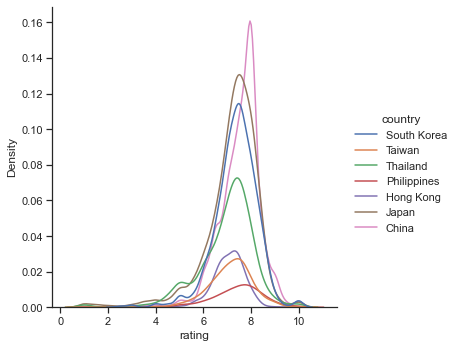

In [45]:
sns.displot(data=df, x="rating", hue="country", kind="kde")

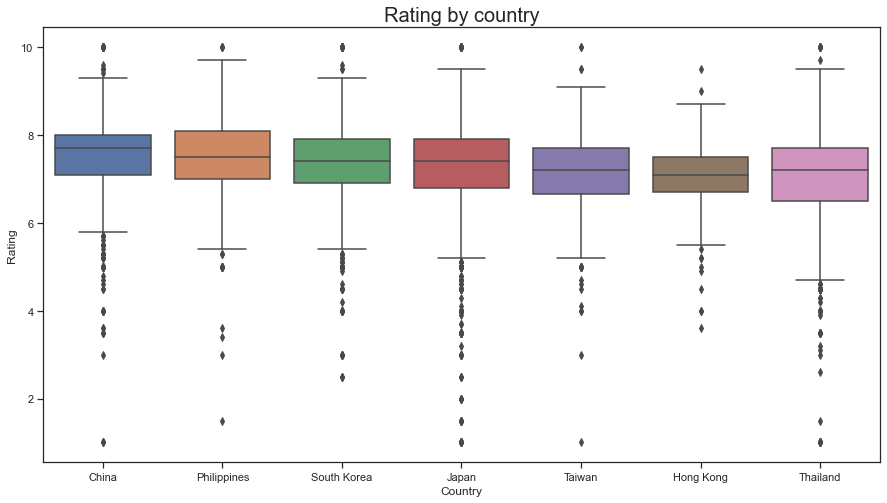

In [63]:
country_rating_all=df.groupby(['country'])['rating'].mean().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.boxplot(x='country', y='rating', data = df, order=country_rating_all)
plt.xlabel("Country")
plt.ylabel("Rating")
plt.title("Rating by country", size=20)
plt.show()

#### Episodes

/Users/elizabethyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(-10.0, 300.0)

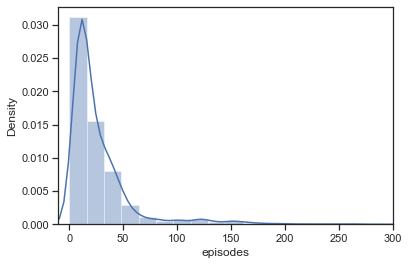

In [115]:
sns.distplot(df.episodes.dropna())
plt.xlim(-10, 300)

(-20.0, 300.0)

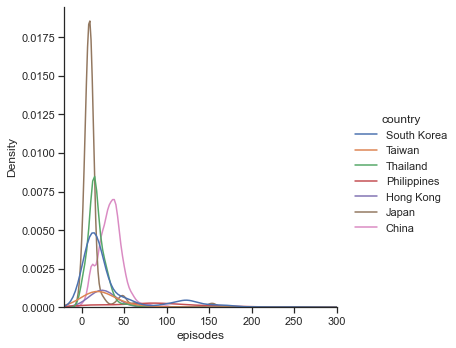

In [113]:
sns.displot(data=df, x="episodes", hue="country", kind="kde")
plt.xlim(-20, 300)

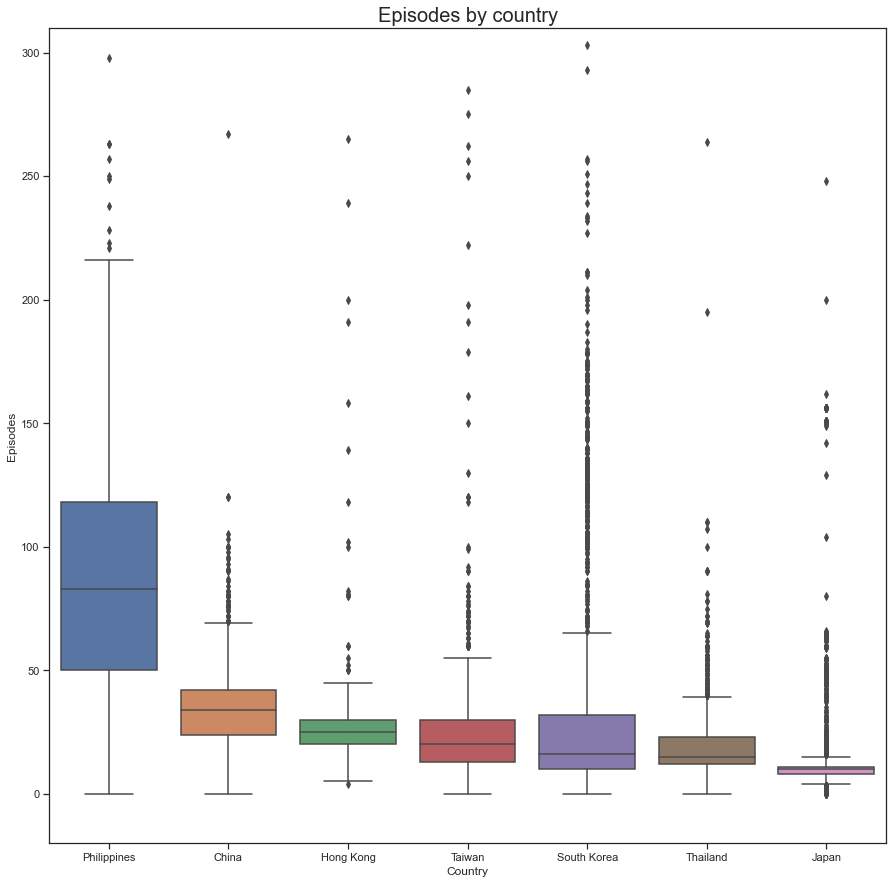

In [114]:
country_episodes=df.groupby(['country'])['episodes'].median().sort_values(ascending=False).index

plt.figure(figsize=(15,15))
sns.boxplot(x='country', y='episodes', data = df, order=country_episodes)
plt.xlabel("Country")
plt.ylabel("Episodes")
plt.title("Episodes by country", size=20)
plt.ylim(-20, 310)
plt.show()

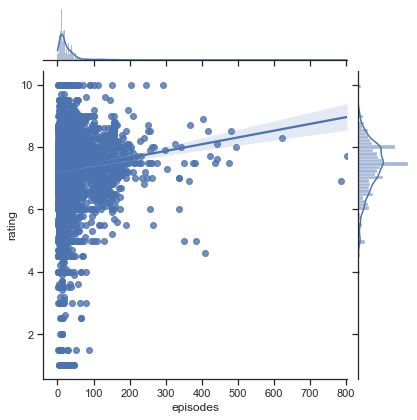

In [101]:
sns.jointplot(x='episodes', y='rating', data=df, kind="reg")

#### Top 100 ranked
I decided to further examine just the ranked top 100 dramas. Korean dramas once again dominated, followed by China and Japan. 2 Filipino dramas made the cut, which I may just have to check out myself.

Text(0.5, 1.0, 'Percentage of Country in Top 100 Dramas')

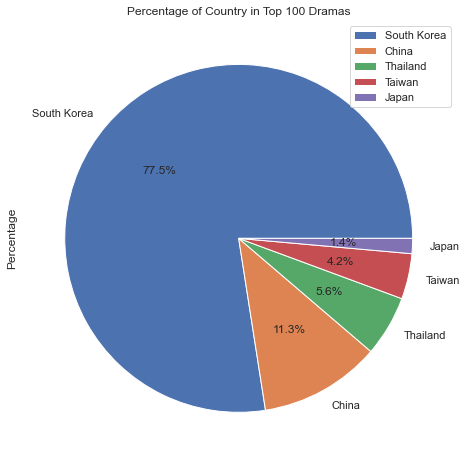

In [18]:
top_100=df[df['ranking']<=100]

top_100_percent = top_100.groupby('country')[['title']].count().sort_values('title', ascending=False).rename(columns={'title':'Percentage'})
plot = top_100_percent.plot.pie(y='Percentage', autopct="%.1f%%", figsize=(8, 8))
plt.title('Percentage of Country in Top 100 Dramas')

From observing average rating of the rank top 100 dramas, Chinese dramas had the highest average rating while Korean dramas had that of the lowest.

Below are the top 10 broadcasting networks of rank top 100 dramas. Korean networks expectedly claimed most spots.

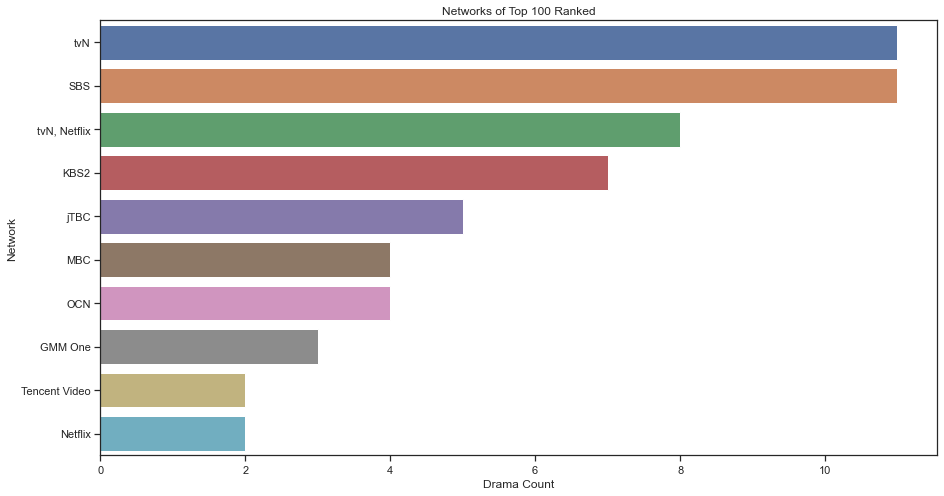

In [61]:
drama_100=top_100['network'].value_counts()

plt.figure(figsize=(15,8))
sns.barplot(x=drama_100[0:10].tolist(), y=drama_100[0:10].index.tolist())
plt.xlabel('Drama Count')
plt.ylabel('Network')
plt.title('Networks of Top 100 Ranked') 
plt.show()

I combined `actor_1` and `actor_2` into one main actor column as they were both considered main roles. Below are the top 10 actors that appeared in the most rank top 1000 dramas.

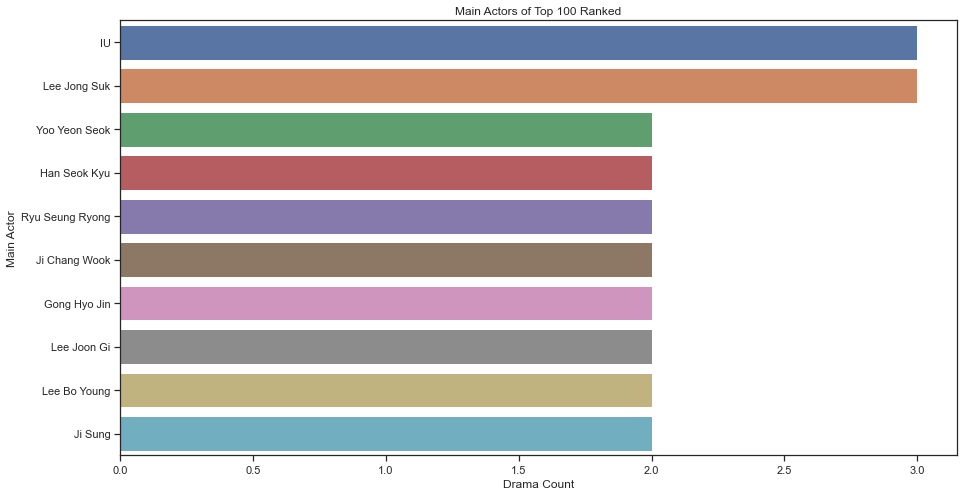

In [60]:
actor_df=top_100[['title', 'actor_1','actor_2']]
actor_df=actor_df.melt('title', value_name='actor').drop('variable', 1)

actor_100=actor_df['actor'].value_counts()

plt.figure(figsize=(15,8))
sns.barplot(x=actor_100[0:10].tolist(), y=actor_100[0:10].index.tolist())
plt.xlabel('Drama Count')
plt.ylabel('Main Actor')
plt.title('Main Actors of Top 100 Ranked') 

plt.show()

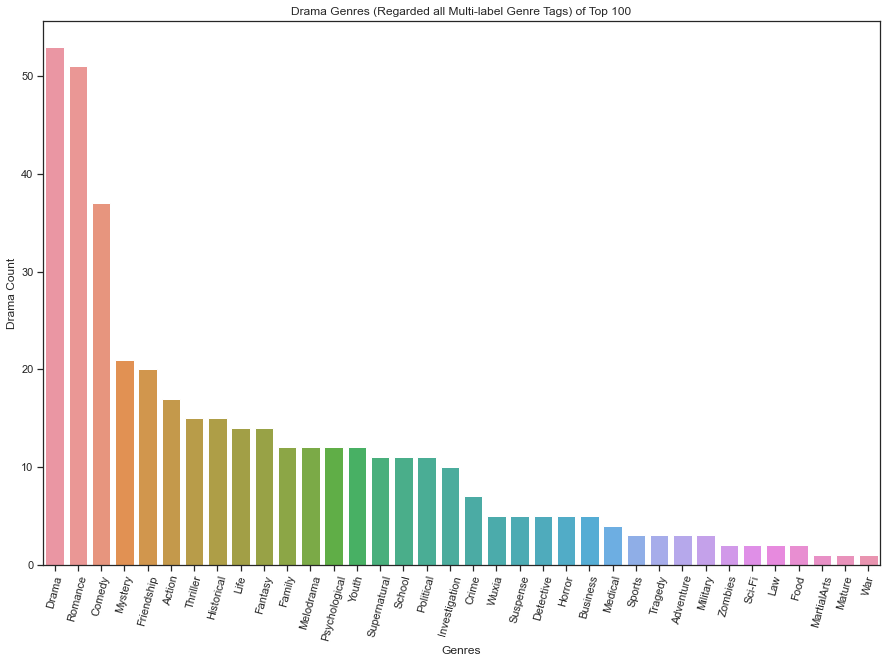

In [57]:
top_100=df[df['ranking']<=100]

drama_genre_top100 = top_100.genre[df['genre'].notnull()]

genre_list = []

genre_splited = []

for i in drama_genre_top100.index:
    for j in drama_genre_top100[i].replace(' ','').split(","):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)
            
drama_genres_count_top100 = pd.Series(genre_splited).value_counts() 

plt.figure(figsize=(15,10))
sns.barplot(x=drama_genres_count_top100.index.tolist(), y=drama_genres_count_top100.tolist())
plt.xlabel('Genres')
plt.ylabel('Drama Count')
plt.title('Drama Genres (Regarded all Multi-label Genre Tags) of Top 100') 
plt.xticks(rotation= 75) 
plt.show()

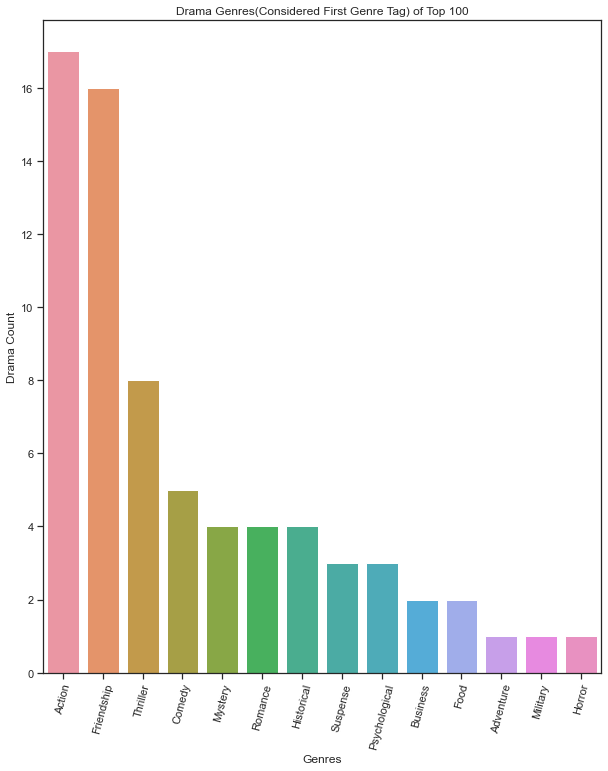

In [56]:
genre_firsts = []

for i in drama_genre_top100.index:
    genre_firsts.append(drama_genre_top100[i].replace(' ','').split(",")[0])

drama_genres_firsts_top100 = pd.Series(genre_firsts).value_counts()   

plt.figure(figsize=(10,12))
sns.barplot(y=drama_genres_firsts_top100.tolist(), x=drama_genres_firsts_top100.index.tolist())
plt.ylabel('Drama Count')
plt.xlabel('Genres')
plt.title('Drama Genres(Considered First Genre Tag) of Top 100') 
plt.xticks(rotation= 75) 
plt.show()

#### Genre

The top 5 most popular drama genres in regards to all multi-label tags were Romance, Drama, Comedy, Family, and Historical.

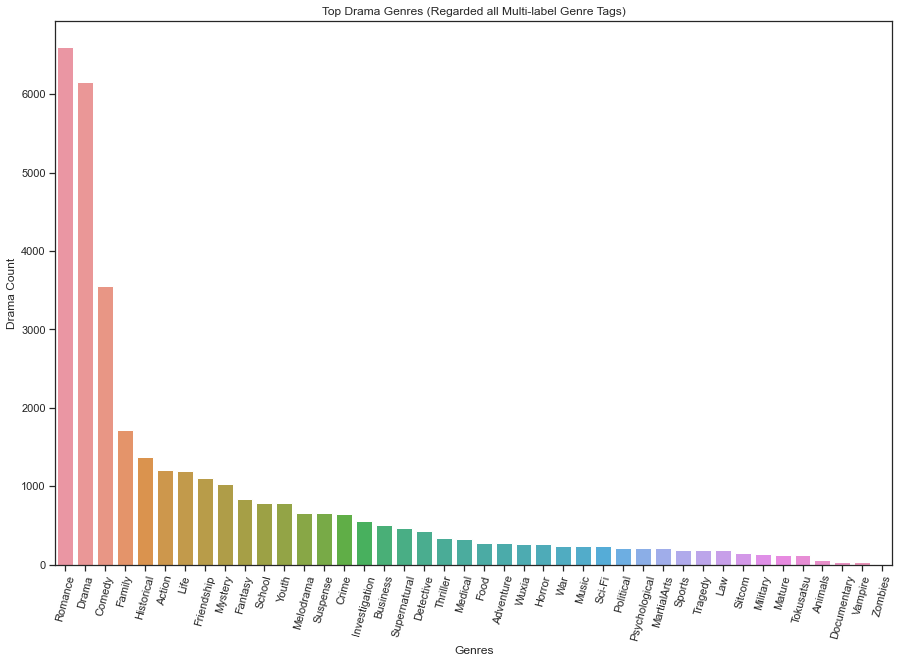

In [22]:
drama_genre = df.genre[df['genre'].notnull()]

genre_list = []

genre_splited = []

for i in drama_genre.index:
    for j in drama_genre[i].replace(' ','').split(","):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)
            
drama_genres_count = pd.Series(genre_splited).value_counts() 

plt.figure(figsize=(15,10))
sns.barplot(x=drama_genres_count.index.tolist(), y=drama_genres_count.tolist())
plt.xlabel('Genres')
plt.ylabel('Drama Count')
plt.title('Top Drama Genres (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 75) 
plt.show()

When considering only the first genre tag, Romance and Comedy were still the most popular drama genre, followed by action, friendship, and historical.

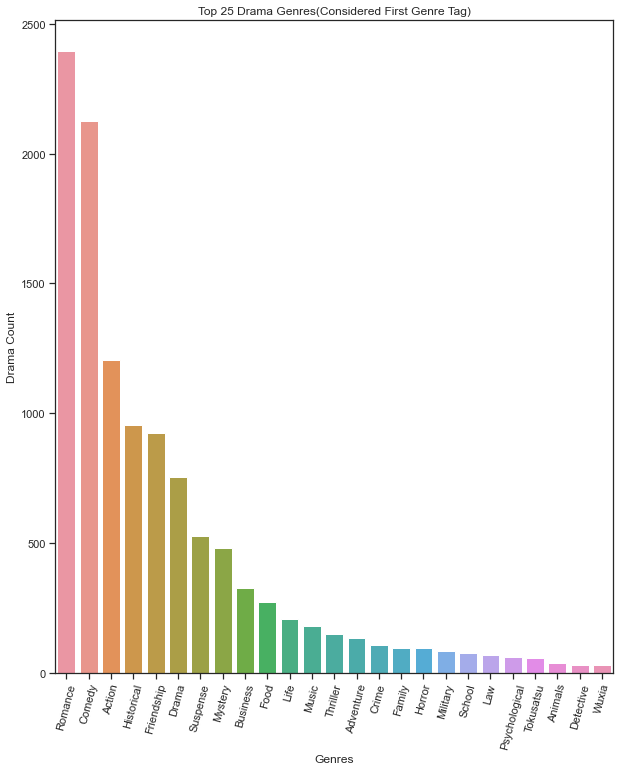

In [29]:
genre_firsts = []

for i in drama_genre.index:
    genre_firsts.append(drama_genre[i].replace(' ','').split(",")[0])

drama_genres_firsts = pd.Series(genre_firsts).value_counts()   

plt.figure(figsize=(10,12))
sns.barplot(y=drama_genres_firsts[0:25].tolist(), x=drama_genres_firsts[0:25].index.tolist())
plt.ylabel('Drama Count')
plt.xlabel('Genres')
plt.title('Top 25 Drama Genres(Considered First Genre Tag)') 
plt.xticks(rotation= 75) 
plt.show()

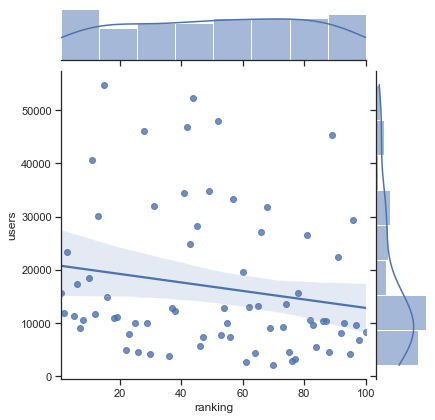

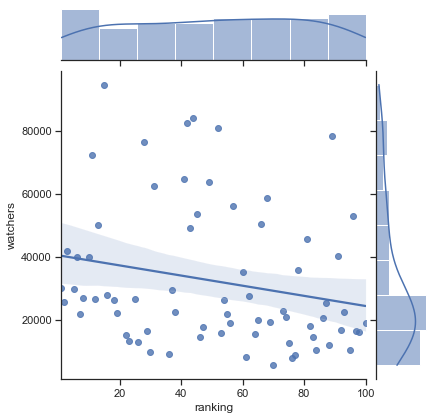

In [73]:
sns.jointplot(x='ranking', y='users', data=top_100, kind="reg")
sns.jointplot(x='ranking', y='watchers', data=top_100, kind="reg")

#### Ranking vs. Popularity & Rating
It's interesting to observe how ranking does not necessarily equal popularity, as the top 2 ranked dramas do not even cut the top 100 of popularity. However, since ranking is calculated based on ratings, it can be observed that the ratings of the top 100 ranked dramas are all greater than 8.6.

title  ranking  popularity  rating  users  watchers  \
9305               The Untamed        1         101     9.4  15641     29922   
0            Hospital Playlist        2         137     9.2  11888     25541   
2340  It's Okay to Not Be Okay        3          47     9.2  23438     41881   
2341           Prison Playbook        5         103     9.1  11426     29684   
2339                    Signal        6          55     9.1  17358     39859   
2338            Flower of Evil        7         174     9.2   9164     21941   
15                   My Mister        8         124     9.1  10545     26902   
14                  Reply 1988       10          54     9.0  18525     39982   
13                      Healer       11          10     9.0  40590     72406   
12                  SKY Castle       12         125     9.0  11698     26604   

          country  start_year  
9305        China        2019  
0     South Korea        2020  
2340  South Korea        2020  
2341  South Korea        2017  
2339  South Korea        2016  
2338  South Korea        2020  
15    South Korea        2018  
14    South Korea        2015  
13    South Korea        2014  
12    South Korea        2018

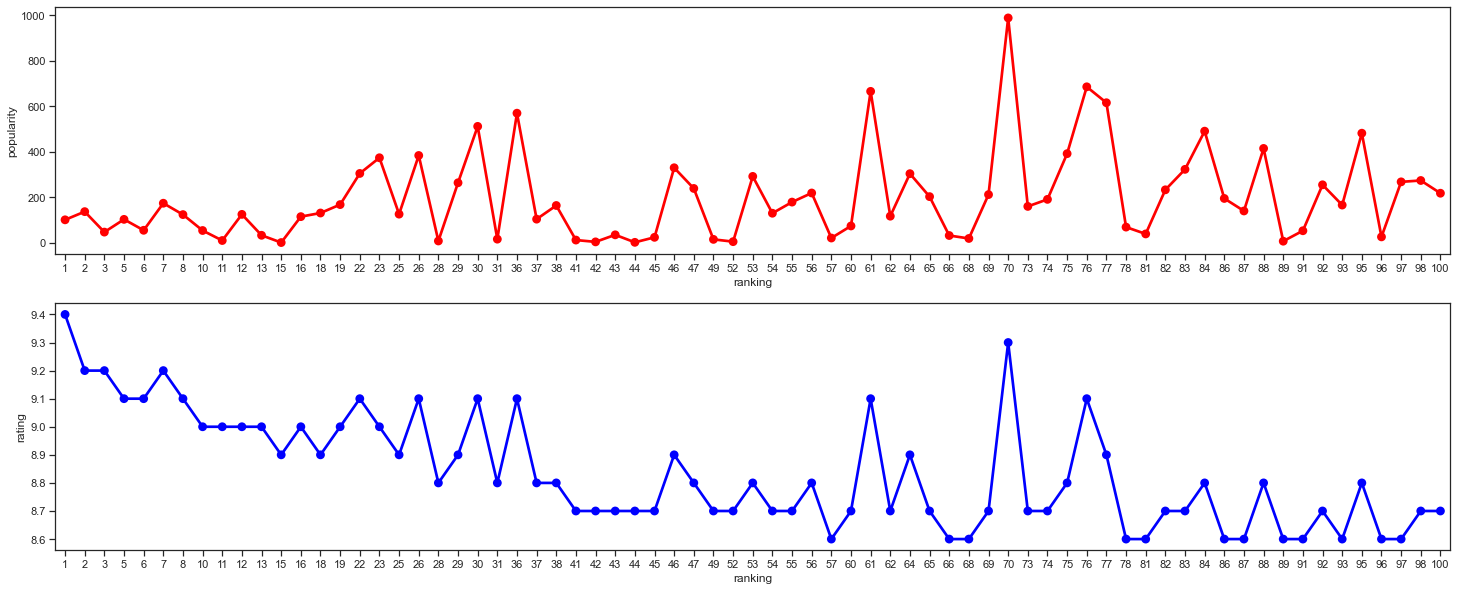

In [39]:
dramas_sorted_by_rank = df[df.ranking<=100].sort_values(by='ranking').loc[:,['title','ranking', 'popularity','rating', 'users', 'watchers', 'country', 'start_year']]
display(dramas_sorted_by_rank.head(10))

fig, (ax1, ax2) = plt.subplots(2, figsize =(25,10))
sns.pointplot(x='ranking',y='popularity',data=dramas_sorted_by_rank,color='red', ax=ax1)
sns.pointplot(x='ranking',y='rating', data=dramas_sorted_by_rank, color='blue', ax=ax2);

Below is a bubble chart for top 100 dramas based on rank and popularity, with points calculated from `rating`, `users`, and `watchers` variables. Most of the dramas are not surprising as most of them are cultural phenomenons in Korea.

In [88]:
popularity_and_rank_100 = df.loc[(df['ranking'] <= 100) & (df['popularity'] <= 100)]
popularity_and_rank_100["point"] = (popularity_and_rank_100["users"] * popularity_and_rank_100["rating"]) * popularity_and_rank_100["watchers"] / 1000000000
display(popularity_and_rank_100.head(5))

<ipython-input-88-1a1452d51c98>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



actor_1         actor_2      country                   date_aired  \
1         Bae Suzy    Lee Jong Suk  South Korea  Sep 27, 2017 - Nov 16, 2017   
4          Ji Sung  Hwang Jung Eum  South Korea  Jan  7, 2015 - Mar 12, 2015   
5   Lee Sung Kyung    Nam Joo Hyuk  South Korea  Nov 16, 2016 - Jan 11, 2017   
10        Gong Yoo      Kim Go Eun  South Korea  Dec  2, 2016 - Jan 21, 2017   
11        Hyun Bin      Son Ye Jin  South Korea  Dec 14, 2019 - Feb 16, 2020   

    episodes                                              genre       network  \
1         32  Thriller,  Mystery,  Comedy,  Romance,  Drama,...           SBS   
4         20           Psychological,  Comedy,  Romance,  Drama           MBC   
5         16  Friendship,  Comedy,  Romance,  School,  Youth...           MBC   
10        16  Comedy,  Romance,  Fantasy,  Melodrama,  Super...           tvN   
11        16    Military,  Comedy,  Romance,  Drama,  Political  tvN, Netflix   

    popularity  ranking  rating  \
1           12       41     8.7   
4           16       31     8.8   
5            8       28     8.8   
10           1       15     8.9   
11          33       13     9.0   

                                                  tag  \
1   Precognition, Nice Male Lead, Neighbors, Murde...   
4   Dissociative Identity Disorder, Trauma, Boss/E...   
5   College Life, Friends To Lovers, Tomboy, Weigh...   
10  Grim Reaper, Older Man/Younger Woman, Interspe...   
11  North And South Korea, Strong Friendship, Love...   

                              title  users  watchers start_date  \
1           While You Were Sleeping  34395     64782 2017-09-27   
4                  Kill Me, Heal Me  32044     62620 2015-01-07   
5   Weightlifting Fairy Kim Bok Joo  46111     76506 2016-11-16   
10                           Goblin  54781     94667 2016-12-02   
11             Crash Landing on You  30049     50108 2019-12-14   

         end_date  start_month  start_year      point  
1    Nov 16, 2017            9        2017  19.385139  
4    Mar 12, 2015            1        2015  17.658038  
5    Jan 11, 2017           11        2016  31.044360  
10   Jan 21, 2017           12        2016  46.154981  
11   Feb 16, 2020           12        2019  13.551258

In [89]:
data = [
    {
        'y':popularity_and_rank_100["popularity"],
        'x': popularity_and_rank_100["ranking"],
        'mode': 'markers',
        'marker': {
            'color': popularity_and_rank_100["popularity"],
            'size':  popularity_and_rank_100["point"],
            'showscale': True,
            'sizemin':4
        },
        "text" :  popularity_and_rank_100["title"]
    }
]

layout = go.Layout(title='In Terms Of Rank And Popularity TOP 100 Dramas',
                   xaxis=dict(title='Ranking'),
                   yaxis=dict( title='Popularity'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Drama Recommendation

To create my drama recommendation system based on genre, I used weighted cosine similarity, which takes in two vectors and returns the dot product of the vectors over the product of their magnitudes. The cosine similarity of a vector with itself will be 1, while the cosine similarity of a vector with an orthogonal vector is 0.

After dummifying the `genre` column, I generated the cosine similarity matrix for all dramas. For a given input drama, a "cosine_score" is calculated which is the cosine similarity with all dramas weighted by the average rating of each drama, and return a sorted list of the top 5 dramas that have the highest cosine score. Naturally, the highest cosine score will come from the input entry, which has perfect cosine similarity of 1 with itself, and likely a high average score (since the user enjoyed the show), so this value is dropped from consideration.

In [116]:
drama_genre_no_space=drama_genre.str.replace(' ', '')
genre_features = drama_genre_no_space.str.get_dummies(sep=',')
print(genre_features.shape)
genre_features.head(5)

(4876, 42)


Action  Adventure  Animals  Business  Comedy  Crime  Detective  \
0       1          1        0         0       0      0          0   
1       0          0        0         0       1      0          0   
2       0          0        0         0       0      0          0   
3       1          0        0         0       0      0          0   
4       0          0        0         0       0      0          0   

   Documentary  Drama  Family  ...  Supernatural  Suspense  Thriller  \
0            0      0       0  ...             0         0         0   
1            0      0       0  ...             0         0         0   
2            0      1       0  ...             0         0         0   
3            0      0       0  ...             0         0         0   
4            0      1       0  ...             0         0         1   

   Tokusatsu  Tragedy  Vampire  War  Wuxia  Youth  Zombies  
0          0        0        0    0      0      0        0  
1          0        0        0    0      0      1        0  
2          0        0        0    0      1      0        0  
3          0        1        0    0      0      0        0  
4          0        0        0    0      0      0        1  

[5 rows x 42 columns]

In [118]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(genre_features)
print(cosine_matrix.shape)

(4876, 4876)


In [119]:
drama_genre_df=df[df['genre'].notna()].reset_index(drop=True)

def recommend_drama(drama_index):
    cos_similarity = pd.DataFrame(cosine_matrix[drama_index]).rename({0: 'cos_sim'}, axis = 'columns')
    weighted_score = pd.DataFrame(drama_genre_df.rating * cos_similarity.cos_sim, columns = ['cos_score'])
    result = pd.concat([drama_genre_df.title, drama_genre_df.genre, cos_similarity.cos_sim, weighted_score.cos_score], axis = 'columns')
    title, genres = drama_genre_df.loc[drama_index, ['title', 'genre']]
    print("Shows similar to '%s', which has genres '%s' are:" % (title, genres))
    return result.drop([drama_index]).sort_values(by='cos_score', ascending = False)[['title', 'cos_score']].head(5)

In [120]:
my_favorite_dramas = ['The Untamed', 'Kingdom', "It's Okay to Not Be Okay", 'Come and Hug Me', 'Ashes of Love']

drama_list_indices = drama_genre_df.loc[drama_genre_df.title.isin(my_favorite_dramas)].index
for index in drama_list_indices:
    output = recommend_drama(index)
    print(output)
    print('')

Shows similar to 'The Untamed', which has genres 'Action,  Adventure,  Historical,  Mystery,  Fantasy' are:
                             title  cos_score
4221           Journey to the West   6.720000
2914       Demi Gods & Semi Devils   6.320000
721    The Investiture of the Gods   6.160000
2005  Xuan-Yuan Sword: Scar of Sky   6.160000
2423         Journey to the West 2   5.988433

Shows similar to 'Come and Hug Me', which has genres 'Suspense,  Thriller,  Romance,  Crime,  Drama,  Family,  Melodrama,  Detective,  Investigation' are:
                         title  cos_score
4679           Graceful Family   6.349803
4770       Love Me If You Dare   6.010408
2409            Queen of Ahyun   5.962848
4817  The World of the Married   5.800000
4118    The Game: Towards Zero   5.755345

Shows similar to 'Ashes of Love', which has genres 'Historical,  Comedy,  Romance,  Wuxia,  Drama,  Fantasy' are:
                              title  cos_score
4814  The Romance of Tiger and Rose   7.941977